In [1]:
#Traffic Sign Classification
#There are several different types of traffic signs like speed limits, no entry, traffic signals, turn left or right, children crossing, no passing of heavy vehicles, etc. Traffic signs classification is the process of identifying which class a traffic sign belongs to.
#In this task, you have to build a deep neural network model that can classify traffic signs present in the image into different categories.

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:\\Users\\aksha\\Downloads\\archive')
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [32]:

data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [33]:
cur_path


'C:\\Users\\aksha\\Downloads\\archive'

In [34]:
for i in range(classes): #the 43 classes in train folder of archive
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a) #first loop will go to train folder 0TH folder 
            image = image.resize((30,30)) #it will choose the first image and resize into 30X30
            image = np.array(image) # then it will change the image into array
            data.append(image)# it will then append that array into a list 'data' which we have defined upar
            labels.append(i) #this process will continue for all images and all folders 43
        except Exception as e:
            print(e)

In [35]:
data = np.array(data) # converting into array

labels = np.array(labels)

In [36]:
#os.mkdir('training')

np.save('./training/data',data) #created a training folder in the archive folder in archive
np.save('./training/target',labels) #for future use

In [37]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [38]:
print(data.shape, labels.shape) #will print te shape of data and label

(39209, 30, 30, 3) (39209,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
# tarining the data

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #printing the shape

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [41]:
# CONVERTING LABELS TO ONEHOT ENCODING
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 43) # tarin the data and to_categoricslly method helps
y_test = to_categorical(y_test, 43)

In [20]:
#BUILD THE MODEL
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))
#outcome should be in 43 classes

In [43]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 117s 82ms/step - loss: 0.2612 - accuracy: 0.9438 - val_loss: 0.0675 - val_accuracy: 0.9796
Epoch 2/20
981/981 [==============================] - 79s 80ms/step - loss: 0.2546 - accuracy: 0.9400 - val_loss: 0.0305 - val_accuracy: 0.9921
Epoch 3/20
981/981 [==============================] - 79s 80ms/step - loss: 0.2727 - accuracy: 0.9375 - val_loss: 0.0449 - val_accuracy: 0.9887
Epoch 4/20
981/981 [==============================] - 79s 80ms/step - loss: 0.2223 - accuracy: 0.9476 - val_loss: 0.0491 - val_accuracy: 0.9864
Epoch 5/20
981/981 [==============================] - 80s 82ms/step - loss: 0.2380 - accuracy: 0.9454 - val_loss: 0.0664 - val_accuracy: 0.9844
Epoch 6/20
981/981 [==============================] - 83s 85ms/step - loss: 0.2696 - accuracy: 0.9416 - val_loss: 0.1270 - val_accuracy: 0.9694
Epoch 7/20
981/981 [==============================] - 79s 81ms/step - loss: 0.2513 - accuracy: 0.9424 - val_loss: 0.0473 - val_accuracy

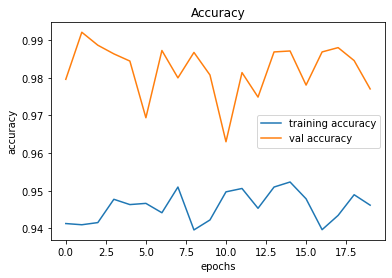

In [45]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

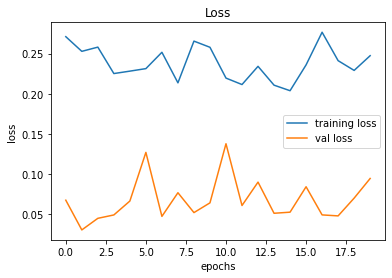

In [46]:

# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
# TESTING ON TEST DATA
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [48]:
X_test, label = testing('Test.csv')

In [49]:
Y_pred = model.predict_classes(X_test)# it will store in y_pred
Y_pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [50]:
# ACCURACY WITH TEST DATA
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.934283452098179


In [51]:
# SAVING THE MODEL
model.save("./training/TSR.h5")

In [1]:
# LOAD THE MODEL
import os
os.chdir(r'C:\\Users\\aksha\\Downloads\\archive')
from keras.models import load_model
model = load_model('./training/TSR.h5') #LOAD THE ORIGINAL TRAINING DATA
# can access that model anytime

In [2]:
# testing on random image
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def test_on_img(img): #create  a function
    data=[] #making an empty list
    image = Image.open(img)  #it will open iamhe 
    image = image.resize((30,30)) # resize
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test) # prediction on image
    return image,Y_pred # and will return prediction and image

Predicted traffic sign is:  Stop


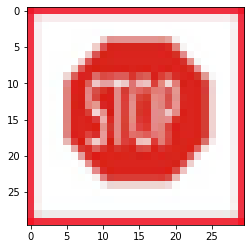

14


In [21]:
plot,prediction = test_on_img(r'C:\Users\aksha\Downloads\sign4.jpg')

s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ",classes[a])
plt.imshow(plot)
plt.show()
print(a)